# 数据可视化实战


## Matplotlib介绍:掌握matplotlib的基本用法和相关参数等


### 1 matplotlib绘图基础


plt.plot(x,y,ls=,lw=,c=,marker=,markersize=,markeredgecolor=,markerfacecolor, label=)
* x:   x轴上的数值
* y:   y轴上的数值
* ls:  折线的风格(‘-‘, ’--‘, ’-.‘和':‘)
* lw:  线条宽度
* c:  颜色
* marker:  线条上点的形状
* markersize:  线条上点的形状
* markeredgecolor:  点的边框色
* markerfacecolor:  点的填充色 
* label:  文本标签 


In [1]:
# 导入相关库
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

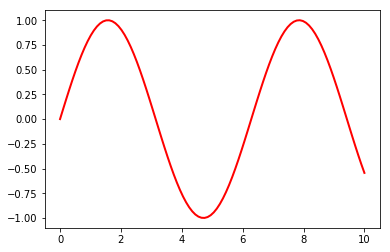

In [2]:
# 简单图形代码
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,c = 'red',lw = 2,ls ='-')
plt.show()

* 参数含义

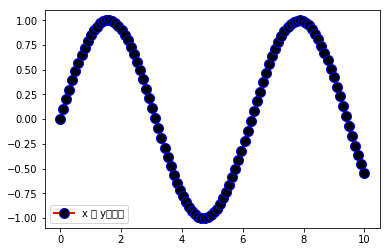

In [3]:
# ls- -函数线条风格(='-' 实线, '--' 虚线 ,'-.' 点划线 ,':' 实点线)
# 调整线条样式，宽度，形状和点

# markersize 点的大小
# marker 线条上点的形状,以下四个参数
## '.'       point marker
# ','       pixel marker
# 'o'       circle marker
# 'v'       triangle_down marker
# c 颜色
# markeredgecolor  点的边框色
# markerfacecolor  点的填充色
# 支持中文显示
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,ls='-',lw=2,marker='o',markersize=10,c= 'red',markeredgecolor ='blue',markerfacecolor='black',label='x 和 y的关系')
plt.legend(loc= 'best')
plt.show()

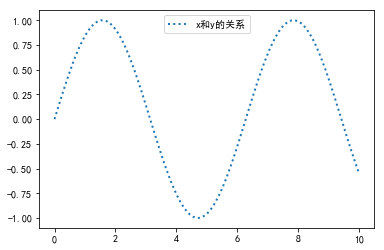

In [4]:
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,ls=':',lw=2,label='x和y的关系')
plt.legend(loc= 'upper center')
plt.show()

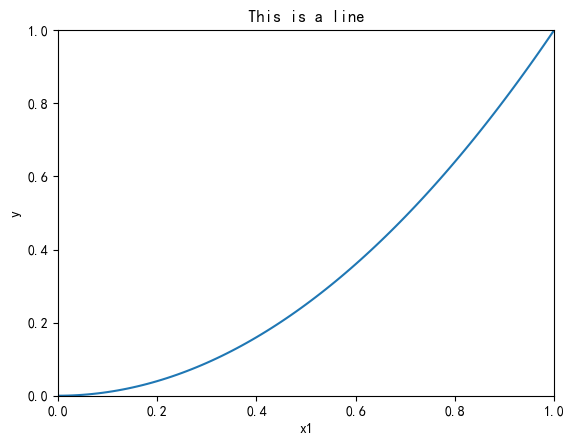

In [5]:
# 添加标签和图例
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x = np.arange(0,1.1,0.01)
y = x**2
plt.figure(figsize=(6.4,4.84),dpi=100,facecolor='white') #确定画布大小，dpi:图形分辨率,边框色
plt.title('This is a line') #添加标题
plt.xlabel('x1')
plt.ylabel('y')
plt.xlim((0,1)) # 确定x轴的范围
plt.ylim((0,1)) # 确定x轴的范围
plt.xticks([0,0.2,0.4,0.6,0.8,1]) #确定x轴的刻度
plt.yticks([0,0.2,0.4,0.6,0.8,1]) #确定y轴的刻度
plt.plot(x,y, label='y =x^2')
#plt.legend(loc='best') # 图例
plt.show()

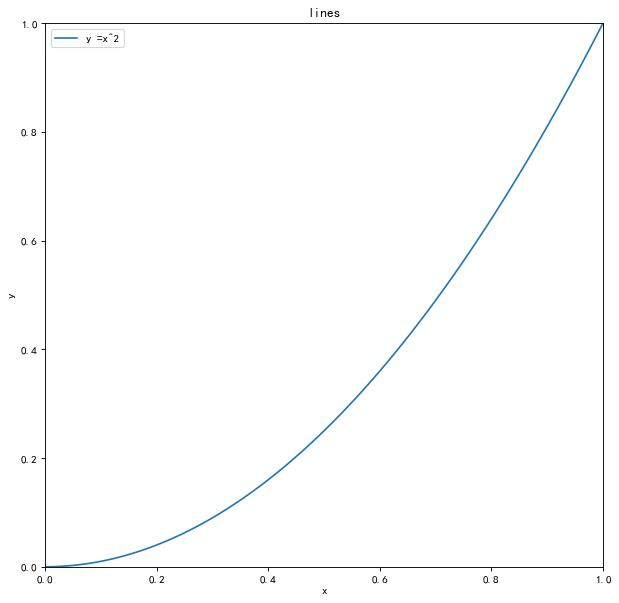

In [6]:
# # # # # # 保存图形
x = np.arange(0,1.1,0.01)
y = x**2
plt.figure(figsize=(9,9),dpi=80) #确定画图大小，dpi:图形分辨率
plt.title('lines') #添加标题
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((0,1)) # 确定x轴的范围
plt.ylim((0,1)) # 确定x轴的范围
plt.xticks([0,0.2,0.4,0.6,0.8,1]) #确定x轴的刻度
plt.yticks([0,0.2,0.4,0.6,0.8,1]) #确定y轴的刻度
plt.plot(x,y,label='y =x^2')
plt.legend(loc='best')
plt.savefig('E:\云开明培训机构\云开见明培训课件\数据可视化实战\可视化.png')
plt.show()

### 2. 简单图形绘制


* 饼图 

In [7]:
import os 
import pandas as pd
os.chdir(r'E:\云开明培训机构\云开见明培训课件\data summary\第四章')
data = pd.read_excel('Prod_Trade.xlsx')


In [8]:
data.head()

,Date,Order_Class,Sales,Transport,Trans_Cost,Region,Category,Box_Type
0,2010-10-13,低级,261.5400,火车,35.00,华北,办公用品,大型箱子
1,2012-02-20,其它,6.0000,火车,2.56,华南,办公用品,小型包裹
2,2011-07-15,高级,2808.0800,火车,5.81,华南,家具产品,中型箱子
3,2011-07-15,高级,1761.4000,大卡,89.30,华北,家具产品,巨型纸箱
4,2011-07-15,高级,160.2335,火车,5.03,华北,技术产品,中型箱子


In [9]:
# 按照地区汇总
data_1 = data.groupby('Region').mean()['Sales']
data_1.index

Index(['东北', '华东', '华北', '华南', '西北', '西南'], dtype='object', name='Region')

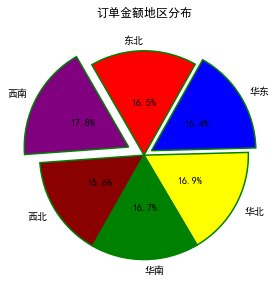

In [10]:
# 构造数据
x_data = data_1.values
y_labels = data_1.index
explode = [0,0.1,0,0,0,0.2]  # 生成数据，用于突出每个饼的形状
colors=['red','blue','yellow','green','darkred','purple']  # 自定义颜色
# 中文乱码和坐标轴负号的处理
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆
plt.axes(aspect='equal')
# 绘制饼图
plt.pie(x = x_data, # 绘图数据
        explode=explode, # 突出显示
        labels=y_labels, # 添加标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.5,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置标签与圆心的距离
        startangle = 120, # 设置饼图的初始角度
        radius = 1.2, # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':10, 'color':'black'}, # 设置文本标签的属性值
        )
# 添加图标题
plt.title('订单金额地区分布',pad =30)
# 显示图形
plt.show()

* 条形图

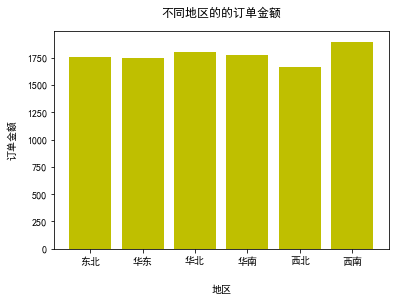

In [13]:
x_data = data_1.values
y_labels = data_1.index
labels = ['q','a','c','e','r','j','b','p']
plt.bar(x = range(0,len(x_data)),height = x_data,align='center',color='y',tick_label= y_labels)
plt.xlabel('地区',labelpad = 19)  # 控制标签和坐标轴的距离
plt.ylabel('订单金额',labelpad =10)
plt.title('不同地区的的订单金额',pad=15)
plt.show()

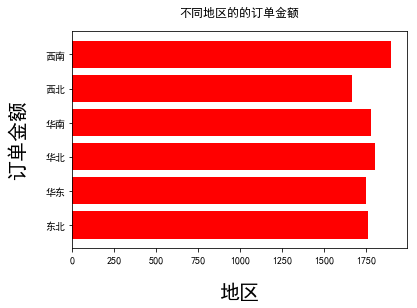

In [14]:
x_data = data_1.values
y_labels = data_1.index
plt.barh( y = range(0,len(x_data)) ,width = x_data,align='center',color='r',tick_label = y_labels)
plt.xlabel('地区',fontsize=20,labelpad =19)
plt.ylabel('订单金额',fontsize=20,labelpad =19)
plt.title('不同地区的的订单金额',pad=15)
plt.show()

* 直方图

In [ ]:
#绘制直方图
plt.hist(x =data['Sales'],bins=30,color='r',edgecolor='black',density=True)
plt.xlabel('销量',fontsize =15,labelpad =20)
plt.ylabel('频数',fontsize =15,labelpad =20)
plt.title('年龄分布图',fontsize =15,pad =20)
plt.show()

In [ ]:
#绘制直方图
plt.hist(x =data['Sales'],bins=30,color='r',edgecolor='black')
plt.xlabel('销量',fontsize =15,labelpad =20)
plt.ylabel('频数',fontsize =15,labelpad =20)
plt.title('年龄分布图',fontsize =15,pad =20)
plt.show()

* 散点图

In [ ]:
sec_buildings = pd.read_excel('sec_buildings.xlsx')

In [ ]:
sec_buildings

In [ ]:

# 画图
plt.scatter(x = sec_buildings['size'],y=sec_buildings['price'],color= 'steelblue',marker='o', s=100)
plt.xlabel('房子大小',fontsize=12) # 坐标轴标签大小
plt.ylabel('房屋总价',fontsize=12)
plt.title('房子大小与房屋总价的关系')
plt.show()

### 3. 图形基本设置


* 设置图例

In [ ]:
plt.plot(data_1.index,data_1.values,label='地区销售金额对比')
plt.legend(loc='upper left', frameon=False) #控制是否有边框
plt.show()

In [ ]:
#调整位置
plt.plot(data_1.index,data_1.values,label='地区销售金额对比')
plt.legend(loc='best', frameon=False,fontsize = 12) #控制是否有边框和调整字体
plt.show()

* 设置图像

In [ ]:
# 图像大小
plt.plot(data_1.index,data_1.values,label='地区销售金额对比')
plt.legend(loc='best', frameon=False,fontsize = 12) #控制是否有边框和调整字体
fig = plt.gcf() #返回当前图像并设置为该图像对象名称为fig
fig.set_size_inches(18.5,10.5)
plt.show()

* 网格线

In [ ]:
plt.plot(data_1.index,data_1.values,label='地区销售金额对比')
plt.legend(loc='best', frameon=False,fontsize = 12) #控制是否有边框和调整字体
plt.legend(loc='upper right',frameon = True)
plt.grid(ls='--',c = 'darkblue')
plt.show()

* 绘制平行于x轴和y轴的水平参考线

In [ ]:
plt.plot(data_1.index,data_1.values,label='地区销售金额对比')
plt.legend()
plt.axhline(y = 1700,c = 'r',ls = '--',lw = 2) # 绘制平行于x轴的
plt.axvline(x = 4,c = 'r',ls = '--',lw = 2) # 绘制平行于y轴的
plt.show()

* 绘制平行于x轴和y轴的参考区域

In [ ]:
plt.plot(data_1.index,data_1.values,label='地区销售金额对比')
plt.legend()
plt.axvspan(xmin=4,xmax=6, facecolor='r',alpha=0.6) #alpha 代表 透明度
plt.axhspan(ymin=250,ymax=1250,facecolor='y',alpha=0.3)
plt.show()